In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import talib as ta 
from talib import RSI
from talib import BBANDS
import matplotlib.pyplot as plt
from matplotlib import style
import requests
style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
import yfinance as yf

In [3]:
a1 = yf.Ticker("TATAMOTORS.NS")
df1 = df1 = a1.history(period="3000d" , interval = '1d')
dfa = a1.history(start='2018-03-01', end='2021-02-25' , interval = '1d')

df = dfa

In [4]:
data = df
position=0
position_index=0
target= 30
stoploss= 1
realised_pnl=0
number_of_trades=0
pnl_l = 0
pnl_h = 0
pnl_l1 = []
position_l = []
position_2 = []
tradebook = {}

In [5]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-03-01,369.750000,376.299988,369.049988,370.750000,6991806,0,0
2018-03-05,368.750000,368.750000,350.100006,352.049988,14665325,0,0
2018-03-06,355.149994,357.950012,345.000000,346.500000,8876632,0,0
2018-03-07,345.000000,355.299988,343.250000,347.799988,15599393,0,0
2018-03-08,350.799988,351.899994,341.049988,345.149994,7674221,0,0
...,...,...,...,...,...,...,...
2021-02-18,331.500000,331.750000,321.100006,323.850006,49204247,0,0
2021-02-19,321.950012,321.950012,301.399994,311.850006,80274683,0,0
2021-02-22,312.450012,313.899994,302.149994,304.500000,57723298,0,0


In [6]:
def BollingerBands(df1, pv=0):
    df1['upper_band'], df1['middle_band'], df1['lower_band'] = ta.BBANDS(df1['Close'], timeperiod =20)
    if pv==1:
        plt.plot(df1['Close'], color = 'black')
        plt.plot(df1['upper_band'], color = 'green')
        plt.plot(df1['lower_band'] , color = 'red')
        plt.show()

In [7]:
def RSI(df1, pv=0):
    df1['RSI'] = ta.RSI(df1['Close'], timeperiod=14)
    if pv==1:
        plt.plot(df1['RSI'], color = 'blue')
        plt.show

In [8]:
def MACD(df1, pv=0):
    df1['macd'], df1['macdsignal'], df1['macdhist'] = ta.MACD(df1['Close'], fastperiod=12, slowperiod=26, signalperiod=14)
    if pv==1:
        plt.plot(df1['macd'], color = 'purple')
        plt.plot(df1['macdsignal'], color = 'pink')
        plt.show

In [9]:
BollingerBands(data)
RSI(data)
MACD(data)


In [10]:
for i in range(1,(len(data)-1)):

    if ((position == 0)):
         if(((data['Close'][data.index[i]] < data['lower_band'][data.index[i]]) and 
            (data['Close'][data.index[i-1]] > data['lower_band'][data.index[i-1]]))):
                position_time=data.index[i]
                position_index=data.index[i]
                entry_price = data.loc[data.index[i+1],'Open']
                position = 1
                print('long position at {}'.format(data.index[i]))
                number_of_trades=number_of_trades+1
                position_l.append(position_index)
                continue

    if (position_index!=0):
         pnl = ((data.loc[data.index[i],'Close']- entry_price)/entry_price)*(position)*100  
#        

    if ((position != 0)):
        if(#(pnl > target)
           ((data['macd'][data.index[i]] < data['macdsignal'][data.index[i]]) and
           (data['macd'][data.index[i-1]] > data['macdsignal'][data.index[i-1]])) 
          
           or
           (pnl < -stoploss)
        ):
            realised_pnl=realised_pnl+pnl
            pnl_l1.append(pnl)
            position=0
            print('position exited at {}'.format(data.index[i]))
            position_index=0
            tradebook[number_of_trades] = {'entry_time' :position_time ,'entry_price': entry_price ,'long_short': position ,'exit_time' :data.index[i], 'pnl' :pnl}
            print(pnl)
        

print(realised_pnl)

long position at 2018-05-14 00:00:00
position exited at 2018-05-15 00:00:00
-4.290121572989005
long position at 2018-05-18 00:00:00
position exited at 2018-05-21 00:00:00
-2.9040216910633716
long position at 2018-05-24 00:00:00
position exited at 2018-05-31 00:00:00
-2.7203836303455287
long position at 2018-06-26 00:00:00
position exited at 2018-06-27 00:00:00
-2.67504926643851
long position at 2018-09-24 00:00:00
position exited at 2018-09-26 00:00:00
-3.1742713263420645
long position at 2018-10-09 00:00:00
position exited at 2018-10-11 00:00:00
-1.639786586966566
long position at 2018-12-06 00:00:00
position exited at 2018-12-10 00:00:00
-3.174110259774653
long position at 2019-02-08 00:00:00
position exited at 2019-03-22 00:00:00
16.81651750009908
long position at 2019-05-08 00:00:00
position exited at 2019-05-13 00:00:00
-1.9262088947230507
long position at 2019-06-17 00:00:00
position exited at 2019-06-19 00:00:00
-2.735852895292846
long position at 2019-07-10 00:00:00
position ex

In [11]:
tradebook_df = pd.DataFrame(tradebook).T
tradebook_df['Profit'] = (tradebook_df['entry_price']*tradebook_df['pnl'])/100

In [12]:
tradebook_df

,entry_time,entry_price,long_short,exit_time,pnl,Profit
1,2018-05-14,324.0,0,2018-05-15,-4.290122,-13.899994
2,2018-05-18,304.75,0,2018-05-21,-2.904022,-8.850006
3,2018-05-24,290.399994,0,2018-05-31,-2.720384,-7.899994
4,2018-06-26,278.5,0,2018-06-27,-2.675049,-7.450012
5,2018-09-24,241.0,0,2018-09-26,-3.174271,-7.649994
6,2018-10-09,186.0,0,2018-10-11,-1.639787,-3.050003
7,2018-12-06,162.25,0,2018-12-10,-3.17411,-5.149994
8,2019-02-08,150.149994,0,2019-03-22,16.816518,25.25
9,2019-05-08,184.300003,0,2019-05-13,-1.926209,-3.550003
10,2019-06-17,159.0,0,2019-06-19,-2.735853,-4.350006


In [13]:
realised_pnl

69.60686024301721

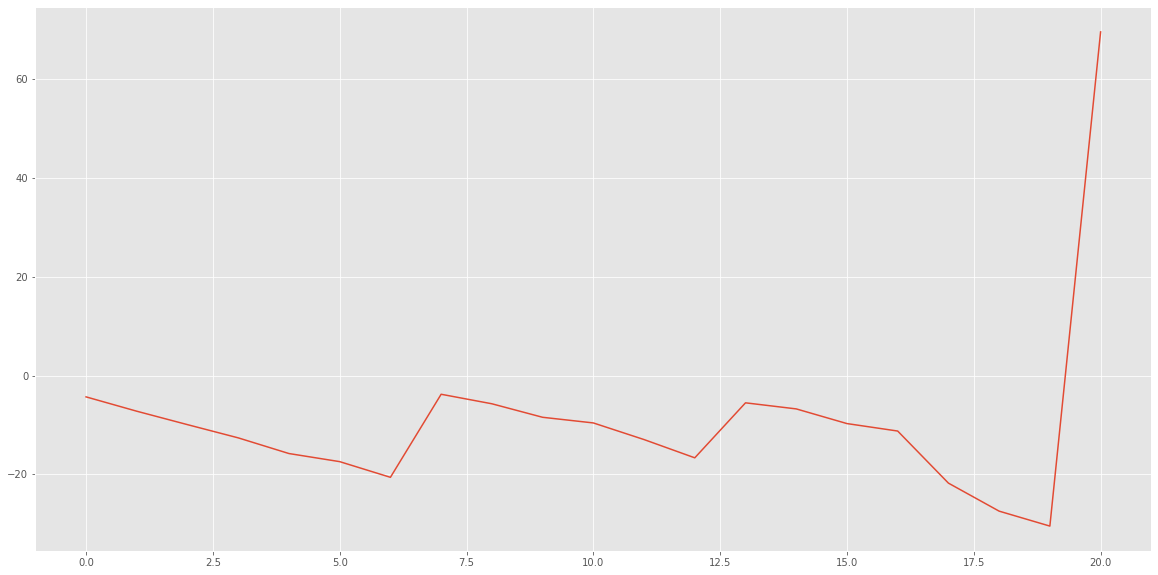

In [14]:
plt.plot()
plt.plot(np.cumsum(pnl_l1))

In [15]:
#Using the strategy in the jupyter notebook
ticker = 'TATAMOTORS'
print(ticker)
ticker = ticker + '.NS'
a1 = yf.Ticker(ticker)
df = a1.history(period="60d" , interval = '5m')

high_1 = 1000
low_1 = -1000
data = df
position=0
position_index=0
target= 30
stoploss= 1
realised_pnl=0
number_of_trades=0
pnl_l = 0
pnl_h = 0
pnl_l1 = []
position_l = []
tradebook = {}

for i in range(len(data)):
    if (data.index[i].time()  == dt.time(10,0)):
        high_1 = df.Close.rolling(9).max()[df.index[i]]
        low_1 = df.Close.rolling(9).min()[df.index[i]] 

    if ((position == 0)&( data.Close.loc[data.index[i]]> high_1 ) & (data.index[i].time() > dt.time(10,0))& (data.index[i].time() < dt.time(12,0))):
            position_time=data.index[i].time()
            position_index=data.index[i]
            entry_price = data.loc[data.index[i+1],'Open']
            position = 1
            print('long position at {}'.format(data.index[i]))
            number_of_trades=number_of_trades+1
            position_l.append(position_index)
            continue
    if ((position == 0)&( data.Close.loc[data.index[i]]< low_1 ) & (data.index[i].time() > dt.time(10,0))& (data.index[i].time() < dt.time(12,0))):
            position_time=data.index[i].time()
            position_index=data.index[i]
            entry_price = data.loc[data.index[i+1],'Open']
            position = -1
            print('short position at {}'.format(data.index[i]))
            number_of_trades=number_of_trades+1
            position_l.append(position_index)
            continue


    if (position_index!=0):

        pnl = ((data.loc[data.index[i],'Close']- entry_price)/entry_price)*(position)*100  
#         print('PNL is {}'.format(pnl))


    if ((position != 0) and ((pnl  >target) or (pnl < -stoploss))):
        realised_pnl=realised_pnl+pnl
        pnl_l1.append(pnl)
        position=0
        print('position exited at {}'.format(data.index[i].time()))
        position_index=0
        tradebook[number_of_trades] = {'entry_time' :position_time ,'entry_price': entry_price ,'long_short': position ,'exit_time' :data.index[i], 'pnl' :pnl}
        print(pnl)
    if ((position != 0) and (data.index[i].time() > dt.time(15,0))):
        realised_pnl=realised_pnl+pnl
        pnl_l1.append(pnl)
        tradebook[number_of_trades] = {'entry_time' :position_time ,'entry_price': entry_price ,'long_short': position ,'exit_time' :data.index[i], 'pnl' :pnl}
        position=0
        print('position covered at {}'.format(data.index[i].time()))
        position_index=0
        print(pnl)
        pnl = 0
print(realised_pnl)


TATAMOTORS
short position at 2020-12-24 10:50:00+05:30
position exited at 12:05:00
-1.6064274255499358
long position at 2020-12-28 10:15:00+05:30
position covered at 15:05:00
1.5229740005514245
short position at 2020-12-29 10:10:00+05:30
position covered at 15:05:00
1.3200496371022705
long position at 2020-12-30 11:20:00+05:30
position covered at 15:05:00
0.21857589971823768
short position at 2020-12-31 10:50:00+05:30
position covered at 15:05:00
0.3512613588510087
short position at 2021-01-01 10:15:00+05:30
position exited at 14:45:00
-1.1640547865715052
short position at 2021-01-04 10:45:00+05:30
position covered at 15:05:00
-0.36706709986585545
short position at 2021-01-05 10:05:00+05:30
position exited at 12:10:00
-1.1042300668756624
long position at 2021-01-06 10:40:00+05:30
position exited at 14:05:00
-1.5368852699293116
long position at 2021-01-08 10:20:00+05:30
position exited at 14:10:00
-1.1459905763481164
short position at 2021-01-11 10:30:00+05:30
position exited at 11:05:0

In [16]:
tradebook_df = pd.DataFrame(tradebook).T
tradebook_df['Profit'] = (tradebook_df['entry_price']*tradebook_df['pnl'])/100

In [17]:
tradebook_df

,entry_time,entry_price,long_short,exit_time,pnl,Profit
1,10:50:00,174.300003,0,2020-12-24 12:05:00+05:30,-1.606427,-2.800003
2,10:15:00,183.850006,1,2020-12-28 15:05:00+05:30,1.522974,2.799988
3,10:10:00,185.600006,-1,2020-12-29 15:05:00+05:30,1.32005,2.450012
4,11:20:00,183.0,1,2020-12-30 15:05:00+05:30,0.218576,0.399994
5,10:50:00,185.050003,-1,2020-12-31 15:05:00+05:30,0.351261,0.650009
6,10:15:00,184.699997,0,2021-01-01 14:45:00+05:30,-1.164055,-2.150009
7,10:45:00,190.699997,-1,2021-01-04 15:05:00+05:30,-0.367067,-0.699997
8,10:05:00,185.649994,0,2021-01-05 12:10:00+05:30,-1.10423,-2.050003
9,10:40:00,195.199997,0,2021-01-06 14:05:00+05:30,-1.536885,-3.0
10,10:20:00,200.699997,0,2021-01-08 14:10:00+05:30,-1.145991,-2.300003


In [18]:
realised_pnl

16.549082251820124

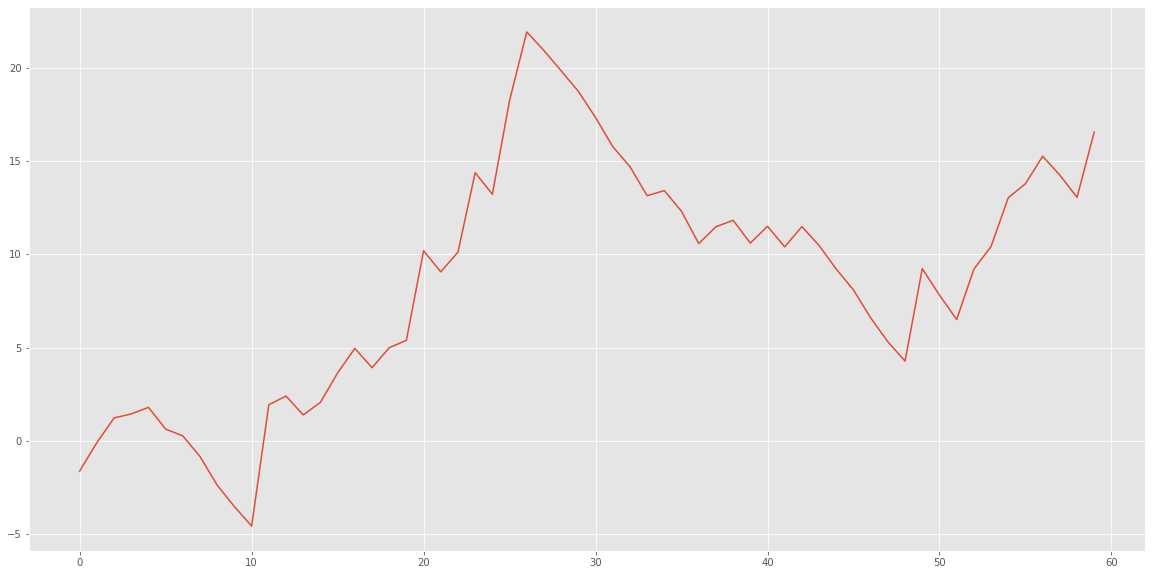

In [19]:
plt.plot()
plt.plot(np.cumsum(pnl_l1))